<a href="https://colab.research.google.com/github/Sivanesh-171/sivanesh/blob/main/zomato_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving zomato.csv.zip to zomato.csv (1).zip


In [ ]:
import zipfile

with zipfile.ZipFile(next(iter(uploaded)), 'r') as z:
    z.extractall()


In [ ]:
df = pd.read_csv("zomato.csv", encoding='latin-1')
df.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

,0
address,17
name,16
online_order,19
book_table,58
rate,7838
votes,78
phone,1296
location,126
rest_type,338
dish_liked,28225


In [ ]:
df['cuisines'] = df['cuisines'].astype(str).str.split(',').str[0]


In [ ]:
df['cuisines'].value_counts().head(3)


,count
cuisines,
North Indian,12299
South Indian,5010
Cafe,4330


In [ ]:
df['cuisines'].describe()


,cuisines
count,56252
unique,2919
top,North Indian
freq,12299


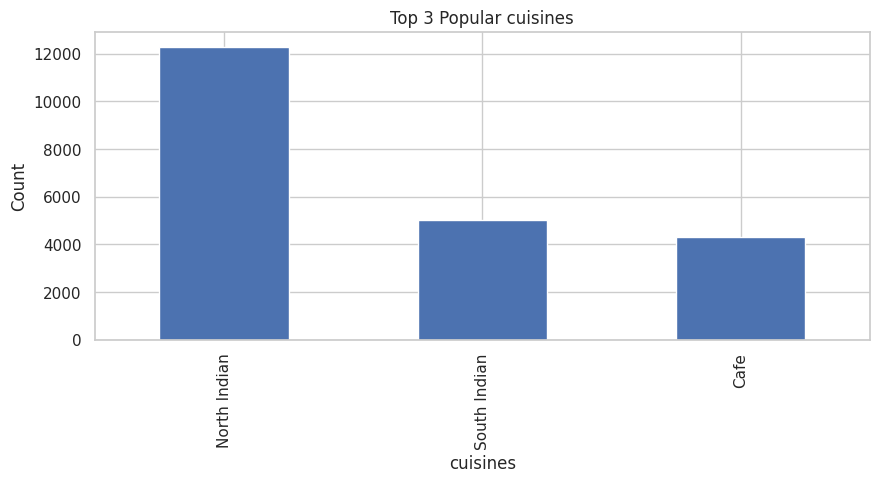

In [ ]:
plt.figure(figsize=(10,4))
df['cuisines'].value_counts().head(3).plot(kind='bar')
plt.title("Top 3 Popular cuisines")
plt.xlabel("cuisines")
plt.ylabel("Count")
plt.show()


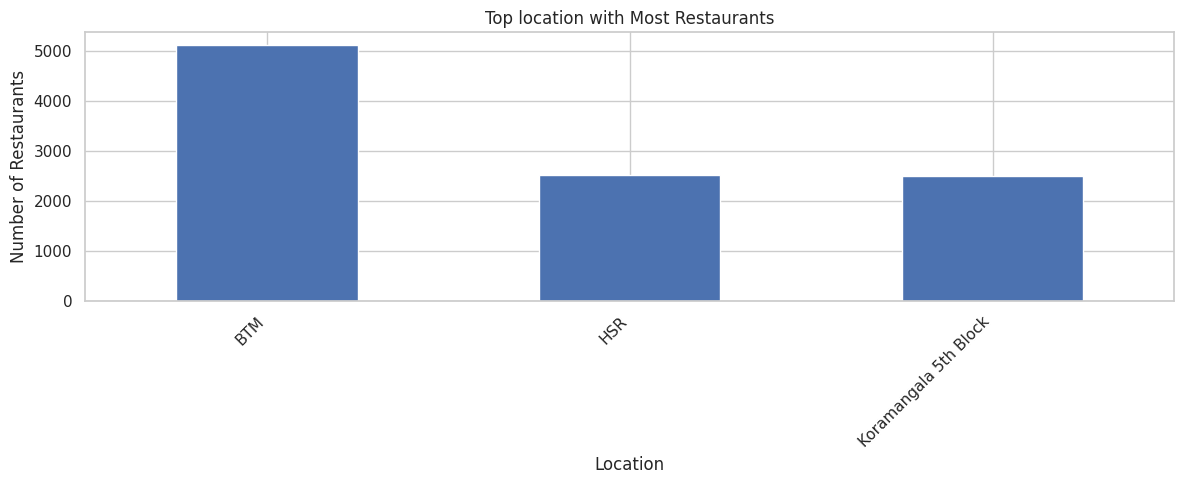

In [ ]:
plt.figure(figsize=(12,5))
df['location'].value_counts().head(3).plot(kind='bar')
plt.title("Top location with Most Restaurants")
plt.xlabel("Location") # Add x-axis label
plt.ylabel("Number of Restaurants") # Add y-axis label
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

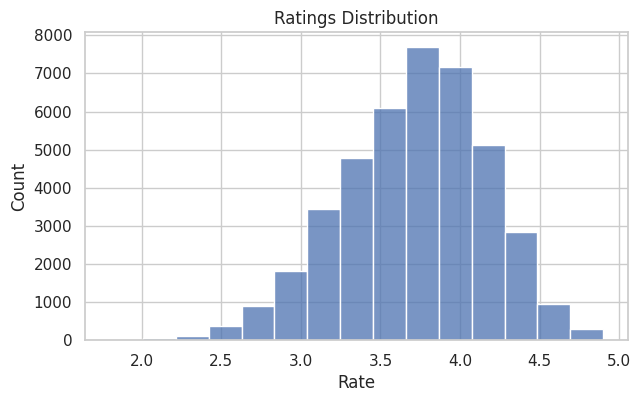

In [ ]:
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].astype(str).str.replace('/5', '')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

plt.figure(figsize=(7,4))
sns.histplot(df['rate'].dropna(), bins=15)
plt.title("Ratings Distribution")
plt.xlabel("Rate")
plt.ylabel("Count")
plt.show()

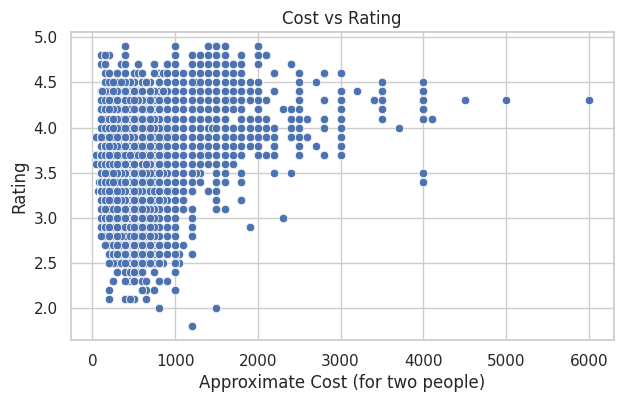

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

plt.figure(figsize=(7,4))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df.dropna(subset=['approx_cost(for two people)', 'rate']))
plt.title("Cost vs Rating")
plt.xlabel("Approximate Cost (for two people)")
plt.ylabel("Rating")
plt.show()

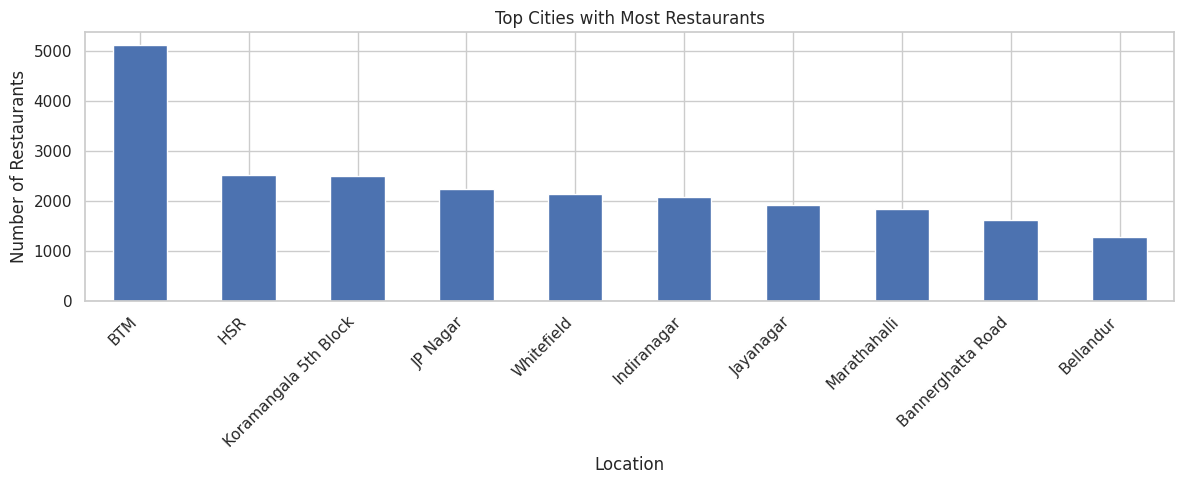

In [ ]:
plt.figure(figsize=(12,5))
df['location'].value_counts().head(10).plot(kind='bar')
plt.title("Top Cities with Most Restaurants")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()